# INF200 Lecture No 14
### Hans Ekkehard Plesser / NMBU
### 11 January 2016

## Today's topics
- Analysis of BioSim Dynamics

## Classic models

### Lotka-Volterra model

- Classic model of predator-prey population dynamics
- Each species is represented by a single density variable
- Dynamics are described by coupled, non-linear differential equations
\begin{align}
\dot{x} &= \alpha x - \beta x y  \\
\dot{y} &= \delta xy - \gamma y 
\end{align}
where $x$ is prey and $y$ is predator.
- Notes:
    - Solutions are continuous functions
    - Fractional values for $x$ and $y$ are possible, and animals never become extinct
    - One can remove three out of the four parameters by re-scaling
- See also [Wikipedia](https://en.wikipedia.org/wiki/Lotka–Volterra_equations)

### Random walk

- We consider this as an example of how to get from a discrete random walk model (fixed steps in space at fixed points in time) to a differential equation describing the time-evolution of the probability distribution for the walkers location
- Consider symmetric random walk in one dimension
- Fixed time step $\tau$
- Walker moves $\pm \Delta$ on each step
- We have discrete time $t_j=j\tau$ and space $x_k=k\Delta$
- We are mainly interested in the probability
$$P(x_k, t_j|x_n, 0)$$
of finding the walker at $x_k$ at time $t_j$ provided it was at $x_n$ at time 0.
- Since each step is independent of each other, the walk forms a Markov chain and we have
$$P(x_k, t_{j}|x_n, 0) = \sum_{m\in\mathbb{Z}} P(x_k, t_{j}|x_m, t_l)P(x_m, t_{l}|x_n, 0)$$
for any $0<l<j$
- The probability that the walker is at $x_k$ at time $t_{j+1}$ is given by the probabilities that it was at one of the neighboring points at $t_j$:
$$P(x_k, t_{j}+\tau|x_n, 0) = \frac{1}{2}P(x_{k}+\Delta, t_{j}|x_n, 0)+\frac{1}{2}P(x_{k}-\Delta, t_{j}|x_n, 0)$$
- Subtracting $P(x_{k}, t_{j}|x_n, 0)$ on both sides, diving both sides by $\tau$ and introducing $1=\Delta^2/\Delta^2$ on the right hand side, we obtain
$$\frac{P(x_k, t_j+\tau|x_n, 0)-P(x_k, t_j|x_n, 0)}{\tau}
 = \frac{\Delta^2}{2\tau}\frac{P(x_{k}+\Delta, t_{j}|x_n, 0)-2P(x_k,t_j|x_n,0)+P(x_{k}-\Delta, t_{j}|x_n, 0)}{\Delta^2}$$
- We recognize the first time derivative on the left-hand side and the second spatial derivative on the right-hand side
- We now take the following limits
    - $\tau\to 0, j\to\infty$ such that $t=j\tau=\mathrm{const}$
    - $\Delta\to 0, k, n\to\infty$ such that $x=k\Delta=\mathrm{const}, x_0=n\Delta=\mathrm{const}$
    - $D=\Delta^2/\tau = \mathrm{const}$
- We then obtain the partial differential equation describing diffusion
\begin{equation}
\frac{\partial}{\partial t} P(x, t| x_0,0) = D \frac{\partial^2}{\partial x^2}P(x, t| x_0, 0)
\end{equation}
- The solution for initial conditions $P(x, t=0; x_0, 0)=\delta(x-x_0)$ and free boundary conditions is
\begin{equation}
P(x, t| x_0, 0) = \frac{1}{\sqrt{4\pi D t}} e^{-\frac{(x-x_0)^2}{4Dt}}
\end{equation}
i.e., a Gaussian centered on $x_0$ with a standard deviation increasing linearly with time.
- Note that the diffusion constant $D$ has units $m^2/{s}$.
- Sources:
    - [Mark Kac's classical paper from 1947](http://www.math.hawaii.edu/~xander/Fa06/Kac--Brownian_Motion.pdf)
    - N.G. van Kampen, [*Stochastic Processes in Physics and Chemistry*](https://books.google.no/books?id=N6II-6HlPxEC&printsec=frontcover&hl=no#v=onepage&q&f=false), Amsterdam, Elsevier, 2007. 

## BioSim model with herbivores

What follows is an exploration of the model. It should not be considered a definite analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

##### Standard herbivore parameters

In [2]:
hp = {'w_birth': 8.,
      'sigma_birth': 1.5,
      'beta': 0.9,
      'eta': 0.05,
      'a_half': 40.,
      'phi_age': 0.2,
      'w_half': 10.,
      'phi_weight': 0.1,
      'mu': 0.25,
      'lambda': 1.,
      'gamma': 0.2,
      'zeta': 3.5,
      'xi': 1.2,
      'omega': 0.4,
      'F': 10.}

##### Fitness function

In [3]:
def q(sgn, x, xhalf, phi):
    return 1. / (1. + np.exp(sgn * phi * (x - xhalf)))

def Phi(a, w, p=hp):
    return (q(+1, a, p['a_half'], p['phi_age'])
            * q(-1, w, p['w_half'], p['phi_weight']))

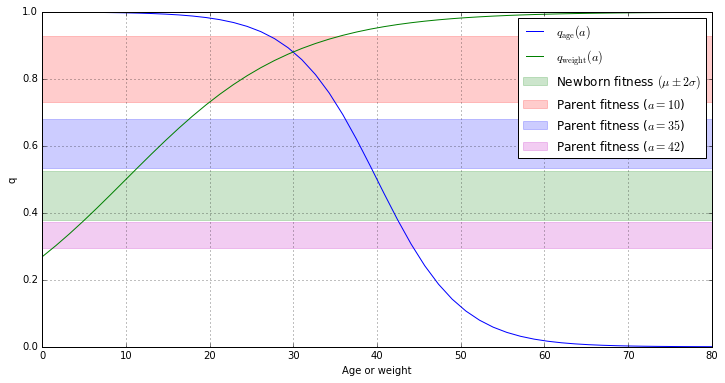

In [4]:
x = np.linspace(0, 80);
plt.plot(x, q(+1, x, hp['a_half'], hp['phi_age']), label='$q_{\mathrm{age}}(a)$');
plt.plot(x, q(-1, x, hp['w_half'], hp['phi_weight']), label='$q_{\mathrm{weight}}(a)$');

plt.fill_between(x, 
                 Phi(np.zeros_like(x), hp['w_birth']-2*hp['sigma_birth']), 
                 Phi(np.zeros_like(x), hp['w_birth']+2*hp['sigma_birth']), 
                 color='g', alpha=.2, label=r'Newborn fitness $(\mu\pm 2\sigma)$')
plt.fill_between(x, 
                 Phi(10*np.ones_like(x), 
                     hp['zeta']*(hp['w_birth']+hp['sigma_birth'])
                     - hp['xi']*(hp['w_birth']+2*hp['sigma_birth'])), 
                 Phi(10*np.ones_like(x), 
                     hp['zeta']*(hp['w_birth']+hp['sigma_birth'])
                     +(1-hp['eta'])*hp['beta']*hp['F']
                     - hp['xi']*(hp['w_birth']-2*hp['sigma_birth'])), 
                 color='r', alpha=.2, label=r'Parent fitness ($a=10$)')
plt.fill_between(x, 
                 Phi(35*np.ones_like(x), 
                     hp['zeta']*(hp['w_birth']+hp['sigma_birth'])
                     - hp['xi']*(hp['w_birth']+2*hp['sigma_birth'])), 
                 Phi(35*np.ones_like(x), 
                     hp['zeta']*(hp['w_birth']+hp['sigma_birth'])
                     +(1-hp['eta'])*hp['beta']*hp['F']
                     - hp['xi']*(hp['w_birth']-2*hp['sigma_birth'])), 
                 color='b', alpha=.2, label=r'Parent fitness ($a=35$)')
plt.fill_between(x, 
                 Phi(42*np.ones_like(x), 
                     hp['zeta']*(hp['w_birth']+hp['sigma_birth'])
                     - hp['xi']*(hp['w_birth']+2*hp['sigma_birth'])), 
                 Phi(42*np.ones_like(x), 
                     hp['zeta']*(hp['w_birth']+hp['sigma_birth'])
                     +(1-hp['eta'])*hp['beta']*hp['F']
                     - hp['xi']*(hp['w_birth']-2*hp['sigma_birth'])), 
                 color='m', alpha=.2, label=r'Parent fitness ($a=42$)')

plt.legend();
plt.xlabel('Age or weight');
plt.ylabel('q');
plt.grid();

Observations:
- Figure above shows range of newborn and parent fitness after birth
- Up to age 35, parents are fitter than newborns after birth
- Beyond age 42, parents are less fit than newborns
- Assuming ready supply of newborns, parents will starve past approximately 40 years of age

### Stationary weight for animals

- Assuming that 
    - animals do not give birth or die
    - there is always fodder $F$ available
- what will be the eventual weight of the animal?
- Let $w_0$ be the birth weight of the animal
- Then the weight at end of year one is
$$w_1 = (1-\eta)(w_0 + \beta F)$$
- For subsequent years we have
\begin{align}
w_2 &= (1-\eta)(w_1 + \beta F) = (1-\eta)((1-\eta)(w_0 + \beta F) + \beta F)\\
w_n &= (1-\eta)(w_{n-1} + \beta F) = (1-\eta)^n w_0 + \beta F \sum_{k=1}^{n}(1-\eta)^k\\
    &= (1-\eta)^n w_0 + \beta F \frac{(1-\eta)-(1-\eta)^{n+1}}{\eta}
\end{align}
- Since $1-\eta<1$, the term in $w_0$ decays over time: the birth weight becomes irrelevant
- For large times, we thus find
$$\bar{w}=\lim_{n\to\infty}w_n=\beta F\frac{1-\eta}{\eta}$$
as the stationary weight.
- Note that $\bar{w}$ solves the defining equation for stationary weight
$$\bar{w} = (1-\eta)(\bar{w}+\beta F)\;.$$
- For standard parameters, we have

In [5]:
hp['beta'] * hp['F'] * (1-hp['eta'])/hp['eta']

170.99999999999997

- This is a testable prediction.

### Death of newborns

- For young animals ($\lt 20$ years), weight determines fitness
- Newborns can survive only if they manage to feed in their first year, otherwise their fitness drops due to weight loss and they have an even smaller chance to feed the next year
- What happens to newborns that do not get to eat at all?
- Let $\Omega_n = \omega(1-\Phi(n, w_n))$ be the probability to die at then end of year $n$ (we assume the animal was born in year 0)
- Then, the probability that an animal born in year 0 survives until the end of year $n$ (does not die in year $n$ or any of the previous years) is given by
$$\Pi_{k=1}^n(1-\Omega_k)$$
- Similarly, the probability that an animal dies at the end of year $n$ is given by
$$\Omega_n\Pi_{k=1}^{n-1}(1-\Omega_k)$$
- Since $\Omega_k$ depends on $\Phi(k, w_k)$ with $w_k=(1-\eta)^k w_0$ (animal does not feed), it is not possible to write down a compact expression for the survival or death probability.
- But we can compute them, assuming an average birth weight

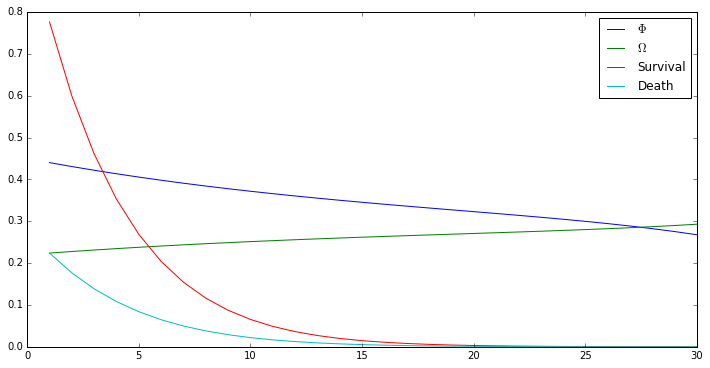

In [6]:
a = np.arange(1, 30.5)
w = hp['w_birth'] * np.ones_like(a) * (1-hp['eta'])**a
f = Phi(a, w)
Om = hp['omega'] * ( 1 - f )
S = np.cumprod(1-Om)
D = Om * S / (1 - Om)  # dividing is same as not multiplying final term

plt.plot(a, f, label='$\Phi$');
plt.plot(a, Om, label='$\Omega$');
plt.plot(a, S, label='Survival');
plt.plot(a, D, label='Death');
plt.legend();

- The chance to survive up to 25 years is very small
- Fitness changes only slowly
- The average lifetime, i.e., average time at death, is

In [7]:
np.sum(a * D)

4.268152588625437

- Newborns who are not fed die on average after 4.3 years
- To see the effect of different birth weights, we consider a large and a small birth weight

In [8]:
a = np.arange(1, 30.5)
w_lo = (hp['w_birth']-2*hp['sigma_birth']) * np.ones_like(a) * (1-hp['eta'])**a
w_hi = (hp['w_birth']+2*hp['sigma_birth']) * np.ones_like(a) * (1-hp['eta'])**a

Om_lo = hp['omega']*(1-Phi(a, w_lo))
Om_hi = hp['omega']*(1-Phi(a, w_hi))

D_lo = Om_lo / ( 1 - Om_lo ) * np.cumprod(1-Om_lo)
D_hi = Om_lo / ( 1 - Om_hi ) * np.cumprod(1-Om_hi)

print "Lifetime (low birthweight):", np.sum(a * D_lo) 
print "Lifetime (high birthweight):", np.sum(a * D_hi) 

Lifetime (low birthweight): 3.89066077164
Lifetime (high birthweight): 5.57061026914


- Lifetimes depend on birth weight
- Roughly ranging from 4 to 6 years

#### Size of surviving newborn population

- Assume $B$ animals are born every year, and have been forever
- Then, the total number of "newborns" alive at the end of year $n$ is
    - surviving newborns from this year, on average $B(1-\Omega_1)$
    - surviving newborsn from the previous year, on average $B(1-\Omega_1)(1-\Omega_2)$
    - etc
- Thus, the total number of "newborns" (animals that never fed after birth) is
\begin{equation}
T = B\sum_{n=1}^{\infty}\Pi_{k=1}^{n} (1-\Omega_k)
\end{equation}
- $T$ is the average number of animals expected, the distribution is more complicated 
- We need to find $T$ numerically, clipping the infinite sum

In [9]:
T_lo = np.sum(np.cumprod(1-Om_lo))
T_hi = np.sum(np.cumprod(1-Om_hi))

print "Relative size of surviving population (low birthweight):", T_lo
print "Relative size of surviving population (high birthweight):", T_hi

Relative size of surviving population (low birthweight): 2.89270763346
Relative size of surviving population (high birthweight): 3.73343047879


- The population of starving young animals is about 3 to 4 times as large as the number of newborns joining it each year.

#### Size of starving old animals

- Assume that animals begin starving after they have given birth, weight around 25, and at age 35

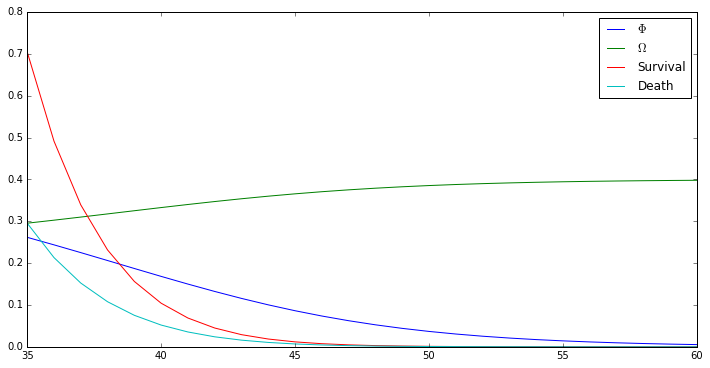

In [10]:
a = np.arange(35, 60.5)
w = 25 * np.ones_like(a) * (1-hp['eta'])**a
f = Phi(a, w)
Om = hp['omega'] * ( 1 - f )
S = np.cumprod(1-Om)
D = Om * S / (1 - Om)  # dividing is same as not multiplying final term

plt.plot(a, f, label='$\Phi$');
plt.plot(a, Om, label='$\Omega$');
plt.plot(a, S, label='Survival');
plt.plot(a, D, label='Death');
plt.legend();

In [11]:
print "Average age at death:", np.sum(a*D)
print "Relative size of starving population:", np.sum(S)

Average age at death: 37.2191585214
Relative size of starving population: 2.21960353936


### Evolution of juvenile who gets to feed

- We assume sufficiently many other animals of same species that birth is certain if possible

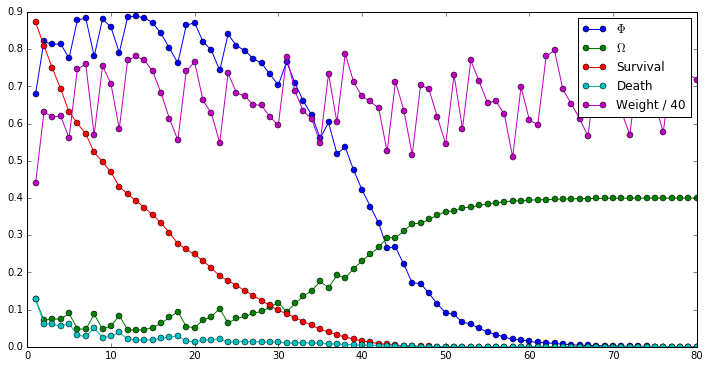

In [12]:
w_old = hp['w_birth']+hp['sigma_birth']
num_years = 80
a = np.arange(1, num_years + 0.5)
w = np.zeros(num_years)
for n in range(num_years):    
    w_old += hp['beta'] * hp ['F']
    if w_old >= hp['zeta'] * ( hp['w_birth'] + hp['sigma_birth'] ):
        bw = np.random.normal(hp['w_birth'], hp['sigma_birth'])
        w_old -= hp['xi'] * bw
    w_old *= (1-hp['eta'])
    w[n] = w_old
f = Phi(a, w)
Om = hp['omega'] * (1-f)
S = np.cumprod(1-Om)
D = Om / ( 1 - Om ) * S

plt.plot(a, f, 'o-', label='$\Phi$')
plt.plot(a, Om, 'o-', label='$\Omega$')
plt.plot(a, S, 'o-', label='Survival')
plt.plot(a, D, 'o-', label='Death')
plt.plot(a, w/40, 'o-', label='Weight / 40')
plt.legend();

- Graph shows values at *end* of year
- For years in which animals give birth, this means that 
    - the animal first feeds, crossing the fertility threshold
    - gives birth and loses weight due to birth
    - we thus see the post-birth weight of the mother
- What is the expected average lifetime of an animal?

In [13]:
print "Average lifetime:", np.sum(a * D)

Average lifetime: 12.9212317286


### Expected population size

We shall try to estimate the population size based on previous estimations and some assumptions.

- In its good years (up to 30), fitness of "adults" rarely drops below 0.75
- What is fitness of very fit newborns (top 0.5%)?

In [14]:
Phi(0, hp['w_birth']+3*hp['sigma_birth'])

0.56198797492288088

- Cannot compete with any "adult" under age 40
- Number of "growing" newborns corresponds to number of dying or "retiring" adults
- Assume number of feeding/breeding adults is $A=F_{\text{avail}}/F$
- Assume retiring at 35, then average number of adult losses is given by death probability up to 35 and survival probability to 35

In [15]:
A = 800. / hp['F']
dA = np.mean(D[:35]) * A
rA = S[35] * A
print A, dA, rA

80.0 2.17730326219 3.19193985799


- We have 80 feeding and breeding animals, about 2 die, 3 retire each year
- About 5.5 newborns can feed per year and grow up, all others starve
- We saw above that 
    - the size of the starving children population is approx 3 times then number of non-feeding newborns
    - the size of the starving retiree population is about 2.2 times the number of retirees
- Thus, the total population size would be approximately
$$A + 3 \times (A - dA - rA) + 2.2 \times rA$$

In [16]:
A + 3 * ( A - dA - rA ) + 2.2 * rA

310.91453832705383

- Right ballpark, but many approximations and assumptions made

#### Refined model

- Above, we did not consider that newborns take about 3 years to gain enough wait to give birth
- Every year, $dA+rA$ newborns survive
    - these need about 3 years to become mature
    - thus, we have $2(dA+rA)$ "juveniles" who feed, but do not breed
    - the number of newborns is thus not $A$, but $A-2(dA+rA)$
    - provided $A-2(dA+rA)\gg dA+rA$, this will not affect the number of newborns getting to feed and growing up
    - only the size of the starving children population is affected
- The total population size would thus become
\begin{equation}
A + 3\times(A- 3\times(dA+rA)) + 2.2\times rA
\end{equation}

In [17]:
A + 3 * ( A - 3 * (dA + rA) ) + 2.2 * rA

278.69907960601307